# Interactive Demo

## Finding the minimum in the Sum of Squared Errors (SSE)

This script allows you to interact with the figures and adjust the intercept and slope
of the line. The SSE is calculated and shown in the bottom graph.




<IPython.core.display.Javascript object>


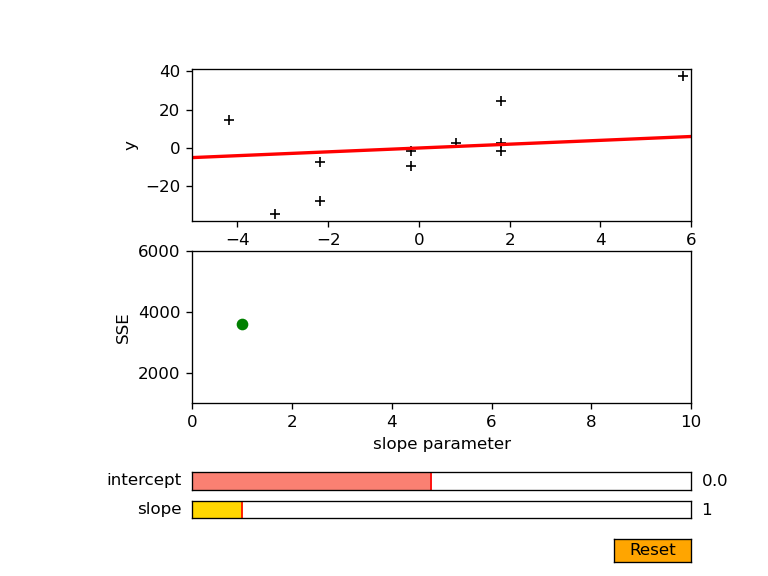

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Sat Feb 27 19:36:06 2016

@author: Oliver Elison Timm

History:

2019-04-26 updated to Python 3 Notebook version.
2016-02-27

# just copied the example from the matplotlib 
# http://matplotlib.org/examples/widgets/slider_demo.html
# Full credits go to the matplotlib.prg team
# added the linear regression fitting
# problem
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider,Button, RadioButtons
from scipy.stats.distributions import norm

%matplotlib notebook

def testdata(isCenter=True):
    """Example data from Collaborative Statistics Book Fig. 12.7:
    Third exams score and Final exams score
    """
    
    x=np.array([ 65, 67, 71, 71, 66, 75, 67, 70, 71, 69, 69])
    #org
    y=np.array([175,133,185,163,126,198,153,163,159,151,159])
    if isCenter:
        x=x-np.mean(x)
        y=y-np.mean(y)
    return (x, y)
    
def SSE(x,y,a=0,b=1):
    """ Sum of Squared Errors (SSE):
    This function calcuates the average squared distance 
    (in direction of the y-axis) of observed data points 
    (x,y) and the linear regression line y_hat=a+bx
    
    Usage:
    
    res=SSE(x,y,a=7.2,b=2.3)
    Here: x and y are numpy arrays (1-dimensional) of same size
    a is the intercept
    b is the slope of the regression line
    
    NOTE: this script may be slow because of the looping
    but it handles NAN in the data!
    """
    #####################################################################
    # A few checks on the objects provided to the function at call
    # must be numpy arrays of same size
    #####################################################################
    res=np.NAN
    isSuccess=True
    # safety check: x, y must be of type numpy.ndarray 
    # (standard numpy arrays) 
    if (type(x) == np.ndarray and type(y) == np.ndarray):
        isSuccess=(isSuccess and True)
    else:
        isSuccess=False
        print ("Error in argument types: call SSE() require ")
        print ("x and y as type of numpy.ndarray")
    # safety check: numpy array must be 1-dimensional
    if len(np.shape(x))==1:
        pass
    else:
        x=np.reshape(x,[np.size(x)])
    if len(np.shape(y))==1:
        pass
    else:
        y=np.reshape(y,[np.size(y)])
    # safety check: length of arrays must match
    if np.size(x)==np.size(y):
        isSuccess=(isSuccess and True)
    else:
        isSuccess=False
        print ("Error in SSE(): arrays x and y must have same size")
    ####################################################################
    # calculation of correlation begins here 
    ####################################################################
    if isSuccess:
        use1=np.logical_not(np.isnan(x))
        use2=np.logical_not(np.isnan(y))
        use=np.logical_and(use1,use2)
        xuse=x[use]
        yuse=y[use]
        n=np.size(xuse)
        if (n>=1):
            yfit=a+b*xuse
            err=(yuse-yfit)
            res=np.dot(err,err)
        else:
            res=np.NAN
            print ("Warning from SSE(): No valid data pairs")
    return res

###############################################################
# Create our test data (you could generate different data sets)
# just define your own function that produces 
# two 1-d numpy arrays.
###############################################################

x,y=testdata()


# need the min max range of the data to adjust sample spaces
# for the following linear regression analysis
xmin=int(np.min(x))-1
xmax=int(np.max(x))+1
ymin=int(np.min(y))-1
ymax=int(np.max(y))+1
x0=np.linspace(xmin,xmax,10)

# initial first guess regression line
default_slope=1
min_slope,max_slope=0,10

default_intercept=0
min_intercept,max_intercept = ymin/2,ymax/2
yfit0=default_slope*x0+default_intercept

xsse_default=default_slope # use slope as xcoordinate for SSE plot
ysse_default=SSE(x,y,a=default_intercept,b=default_slope) 


min_sse,max_sse = 1000, 6000


#############################################################
# INTERACTIVE WIDGETS: 
#
# Definition of call-back functions (actions that we take when 
# the widgets report an interaction with the user)
#############################################################

def update(val):
    # get the value from the slider position
    """allows interaction with the sliders (via mouse), and
    it returns the slider's current value"""
    a=slda.val
    b=sldb.val
    yhelp=a+b*x0
    line.set_ydata(yhelp)
    ysse=SSE(x,y,a=a,b=b) # inside we can use the x,y from outside !?
    pointsse.set_ydata(ysse)
    pointsse.set_xdata(b)
    # the line is updated (y-coordinates)
    fig.canvas.draw_idle() # update the plot 

def reset(event):
    """Set back the slider to the default values"""
    slda.reset()
    sldb.reset()
   
   


##################################################################
# preparing a figure with subplots()
# two objects are returned, a figure and an object for the axes
# The cool thing is, you can build step-by-step your plot!
##################################################################


fig,ax = plt.subplots(2,1)
# setting the plot area offset (30%) from the bottom left window corner
plt.subplots_adjust(left=0.25,bottom=0.30)
# coordinate system





##################################################################
# PYLEV: advanced
# we create a line plot, the function returns the line-object
# so we can update it (change colors, change the data values etc)
# Note the syntax "line, ="! PYLEV: moderate
#################################################################

scatter, = ax[0].plot(x,y,'+',color='black')
line, =ax[0].plot(x0,yfit0,lw=2,color='red') 

ax[0].set_xlim([xmin,xmax])
ax[1].set_ylim([ymin,ymax])
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
ax[1].set_ylim([min_sse,max_sse])
ax[1].set_xlim([min_slope,max_slope])
ax[1].set_xlabel("slope parameter")
ax[1].set_ylabel("SSE")
pointsse, = ax[1].plot(xsse_default,ysse_default,'o',color='green')

############################################################
# Each widget get's a new relative position in the window
# window coordinates left, bottom, right, top position 
# (all between 0 -1)
############################################################
# The control slider


axslope=plt.axes([0.25,0.1,0.65,0.03])
axintercept=plt.axes([0.25,0.15,0.65,0.03])

sldb=Slider(axslope,'slope',min_slope,max_slope,valinit=default_slope,color='gold')
slda=Slider(axintercept,'intercept',min_intercept,max_intercept,valinit=default_intercept,color='salmon')

# Reset Button 
resetax = plt.axes([0.8, 0.025, 0.1, 0.04]) # new relative axes fpr button

bttnreset=Button(resetax,'Reset',color="orange",hovercolor='red')
bttnreset.on_clicked(reset)   # reset button 




###############################################################
# Each widget has a 'listener function': It checks it the user
# has been interacting with the widgets.
###############################################################
slda.on_changed(update)    # slider for the mean
sldb.on_changed(update) # slider for the standard deviation


# last we show the interactive figure

plt.show() 


# Why we don't need a main loop or something is not clear to me.
# The is a background process thread that monitors the status of 
# the slider bars and if modified the call-back functions are
# activated and the canvas content is updated. 
# somehow plt.show() must include this already.  
# But it works now in Jupyter notebooks.

References:

Programming of interactive graphs __is not__ part of the learning goals. But if you want to learn a bit more about the widget options you have in Python Notebooks here is a link to the official documentation.
    
- [Intereactive Notebooks with widgets](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20Basics.html)
